In [1]:
from ultralytics import YOLO

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/chris/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-18 Python-3.10.0 torch-2.1.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
img = 'https://www.science.org/do/10.1126/science.aar6427/full/traffic_16x9-1644914665287.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 720x1280 12 persons, 53 cars, 2 motorcycles, 5 buss, 1 traffic light
Speed: 197.3ms pre-process, 55.2ms inference, 1.1ms NMS per image at shape (1, 3, 384, 640)


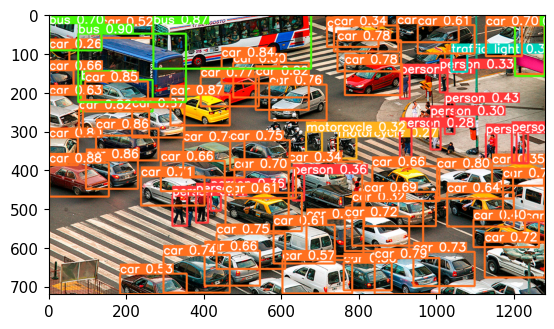

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
results.render()

[array([[[ 72, 249,  10],
         [ 72, 249,  10],
         [ 72, 249,  10],
         ...,
         [  0,   8,   0],
         [  0,   5,   3],
         [ 12,   3,   4]],
 
        [[ 72, 249,  10],
         [ 72, 249,  10],
         [ 72, 249,  10],
         ...,
         [ 34, 110,  14],
         [ 27,  96,   4],
         [ 23,  54,   5]],
 
        [[ 72, 249,  10],
         [ 72, 249,  10],
         [ 72, 249,  10],
         ...,
         [ 72, 249,  10],
         [ 72, 249,  10],
         [ 72, 249,  10]],
 
        ...,
 
        [[180, 151, 119],
         [180, 141, 112],
         [181, 133, 110],
         ...,
         [  7,  10,   3],
         [ 11,  16,  10],
         [ 22,  28,  24]],
 
        [[146, 115,  86],
         [143, 103,  77],
         [158, 112,  89],
         ...,
         [ 70,  69,  67],
         [  0,   7,   4],
         [ 21,  36,  33]],
 
        [[159, 128, 100],
         [164, 124,  99],
         [184, 139, 118],
         ...,
         [100,  95,  99],
  

In [9]:
np.squeeze(results.render()).shape

(720, 1280, 3)

In [10]:
np.array(results.render()).shape

(1, 720, 1280, 3)

## real time detection:

In [11]:
cap = cv2.VideoCapture(0) #change parameter if you want to use different source of video
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

: 

## Train from Scratch

In [10]:
import uuid # unique identifier
import os
import time

In [11]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [6]:
cap = cv2.VideoCapture(0)
#Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    #loop through image range
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH, label + '.'+str(uuid.uuid1()) +'.jpg')
        
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image collection', frame)
        
        time.sleep(2)
    if cv2.waitKey(10) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for drowsy, image number 0
collecting images for drowsy, image number 1
collecting images fo

: 

In [9]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label + '.'+str(uuid.uuid1()) +'.jpg')
        print(imgname)

collecting images for awake, image number 0
data/images/awake.98a4449e-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 1
data/images/awake.98a44728-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 2
data/images/awake.98a447be-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 3
data/images/awake.98a4482c-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 4
data/images/awake.98a4489a-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 5
data/images/awake.98a44908-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 6
data/images/awake.98a4496c-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 7
data/images/awake.98a449da-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 8
data/images/awake.98a44a3e-9e06-11ee-914a-1295e269e6c6.jpg
collecting images for awake, image number 9
data/images/awake.98a44aa2-9e

In [21]:
from ultralytics import YOLO

In [22]:
model = YOLO("yolov8n.yaml")


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [7]:
model = YOLO("yolov8n.yaml")
model.train(data = "dataset.yaml", epochs= 3)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /Users/chris/Documents_local/YOLO/data/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 3820.12it/s]

train: New cache created: /Users/chris/Documents_local/YOLO/data/labels.cache



val: Scanning /Users/chris/Documents_local/YOLO/data/labels.cache... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

Plotting labels to runs/detect/train6/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train6
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      2.794      4.479      4.554         19        640: 100%|██████████| 3/3 [00:13<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.96s/it]

                   all         40         40    0.00181      0.541    0.00194   0.000495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      2.532      4.326      4.438         18        640: 100%|██████████| 3/3 [00:12<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.80s/it]

                   all         40         40    0.00181      0.541    0.00178   0.000496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      2.785      4.318      4.468         22        640: 100%|██████████| 3/3 [00:12<00:00,  4.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]

                   all         40         40    0.00126      0.497    0.00139   0.000591

3 epochs completed in 0.015 hours.


Optimizer stripped from runs/detect/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train6/weights/best.pt, 6.2MB

Validating runs/detect/train6/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.0 torch-2.1.2 CPU (Apple M3 Pro)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]


                   all         40         40    0.00152      0.545    0.00168   0.000677
          {0: 'awake'}         40         21   0.000688      0.143   0.000438    8.1e-05
         {1: 'drowsy'}         40         19    0.00236      0.947    0.00293    0.00127
Speed: 0.6ms preprocess, 79.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x3153e8a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [3]:
cap = cv2.VideoCapture(0)
# H, W, _ = frame.shape
# out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

threshold = 0.5

while True:
    ret, frame = cap.read()
    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    # out.write(frame)
    ret, frame = cap.read()
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break

cap.release()
# out.release()
cv2.destroyAllWindows()


0: 384x640 (no detections), 45.5ms
Speed: 2.7ms preprocess, 45.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 39.5ms
Speed: 1.7ms preprocess, 39.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 51.8ms
Speed: 2.0ms preprocess, 51.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 42.7ms
Speed: 1.9ms preprocess, 42.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.2ms
Speed: 2.2ms preprocess, 43.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.3ms
Speed: 1.9ms preprocess, 43.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 43.6ms
Speed: 2.0ms preprocess, 43.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 45.8ms
Speed: 2.3ms preprocess, 45.8ms i

KeyboardInterrupt: 